# UK Housing Price Prediction - Initial Data Inspection

**Author:** Abdul Salam Aldabik  
**Date:** November 2025  
**Course:** CloudAI - Machine Learning Project  
**Dataset:** UK Housing Prices (2005-2017)

---

## Objective
Perform initial inspection of the UK housing price dataset to understand:
- Data structure and size
- Column types and content
- Price distribution and ranges
- Potential data quality issues

## CloudAI Reference
- **Chapter 5:** Data Augmentation - Understanding data before cleaning
- **Chapter 1-2:** Data exploration fundamentals

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Configure visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Setup Paths and Directories

In [2]:
# Define project structure
DATA_DIR = Path('../Data')
OUTPUT_DIR = DATA_DIR / 'inspection_output'
OUTPUT_DIR.mkdir(exist_ok=True)

# Data file path
DATA_FILE = DATA_DIR / 'price_paid_records.csv'

print(f"✓ Data directory: {DATA_DIR}")
print(f"✓ Output directory: {OUTPUT_DIR}")
print(f"✓ Data file: {DATA_FILE}")
print(f"✓ File exists: {DATA_FILE.exists()}")

✓ Data directory: ..\Data
✓ Output directory: ..\Data\inspection_output
✓ Data file: ..\Data\price_paid_records.csv
✓ File exists: True


## 3. Load Sample Data

Load a sample of 100,000 rows to quickly inspect data structure without loading the full 2GB file.

In [3]:
# Load sample for quick inspection
sample_size = 100000
df_sample = pd.read_csv(DATA_FILE, nrows=sample_size)

print(f"✓ Sample loaded: {df_sample.shape[0]:,} rows × {df_sample.shape[1]} columns")
print(f"✓ Memory usage: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✓ Sample loaded: 100,000 rows × 11 columns
✓ Memory usage: 56.00 MB


## 4. Data Structure Overview

In [4]:
# Display basic information
print("\n=== COLUMN INFORMATION ===")
df_sample.info()

print("\n=== FIRST 5 ROWS ===")
display(df_sample.head())

print("\n=== DATA TYPES ===")
display(df_sample.dtypes)


=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      100000 non-null  object
 1   Price                              100000 non-null  int64 
 2   Date of Transfer                   100000 non-null  object
 3   Property Type                      100000 non-null  object
 4   Old/New                            100000 non-null  object
 5   Duration                           100000 non-null  object
 6   Town/City                          100000 non-null  object
 7   District                           100000 non-null  object
 8   County                             100000 non-null  object
 9   PPDCategory Type                   100000 non-null  object
 10  Record Status - monthly file only  100000 non-null  object
dtypes: int64(1), object(10)
m

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A



=== DATA TYPES ===


Transaction unique identifier        object
Price                                 int64
Date of Transfer                     object
Property Type                        object
Old/New                              object
Duration                             object
Town/City                            object
District                             object
County                               object
PPDCategory Type                     object
Record Status - monthly file only    object
dtype: object

## 5. Price Statistics

Analyze price distribution to identify potential outliers and data quality issues.

In [5]:
# Price column (typically second column)
price_col = df_sample.columns[1]

print("=== PRICE STATISTICS ===")
print(df_sample[price_col].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

print(f"\n✓ Minimum price: £{df_sample[price_col].min():,.0f}")
print(f"✓ Maximum price: £{df_sample[price_col].max():,.0f}")
print(f"✓ Median price: £{df_sample[price_col].median():,.0f}")
print(f"✓ Mean price: £{df_sample[price_col].mean():,.0f}")

=== PRICE STATISTICS ===
count    1.000000e+05
mean     6.843656e+04
std      5.802270e+04
min      5.250000e+03
1%       1.300000e+04
5%       2.295000e+04
25%      4.000000e+04
50%      5.500000e+04
75%      7.900000e+04
95%      1.549950e+05
99%      2.750000e+05
max      2.660000e+06
Name: Price, dtype: float64

✓ Minimum price: £5,250
✓ Maximum price: £2,660,000
✓ Median price: £55,000
✓ Mean price: £68,437


## 6. Visualizations

### 6.1 Price Distribution

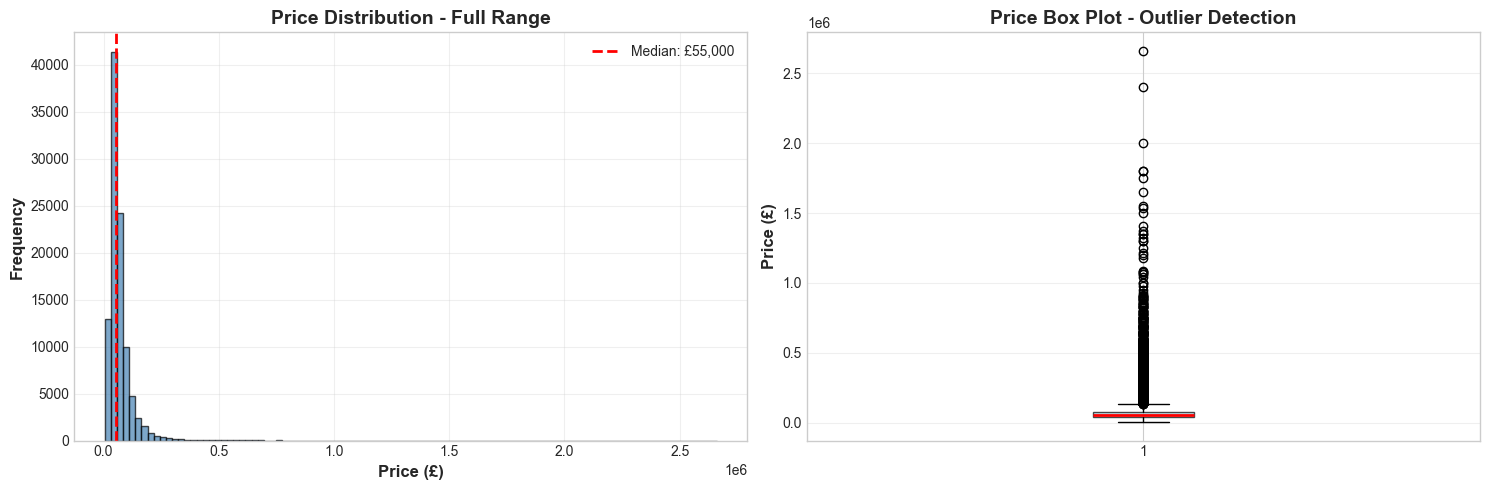

✓ Saved: 01_price_distribution.png


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_sample[price_col], bins=100, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].axvline(df_sample[price_col].median(), color='red', linestyle='--', linewidth=2, 
                label=f'Median: £{df_sample[price_col].median():,.0f}')
axes[0].set_xlabel('Price (£)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Price Distribution - Full Range', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box plot
axes[1].boxplot(df_sample[price_col], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Price (£)', fontsize=12, fontweight='bold')
axes[1].set_title('Price Box Plot - Outlier Detection', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '01_price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 01_price_distribution.png")

### 6.2 Property Type Distribution

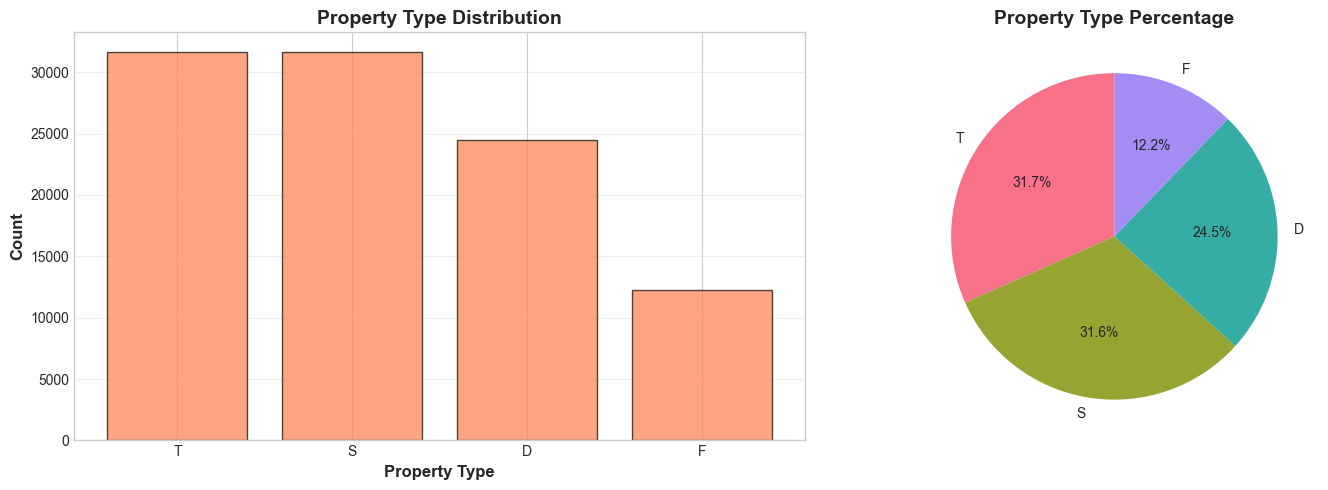

✓ Saved: 02_property_types.png


In [7]:
# Property type column (typically 4th column)
prop_type_col = df_sample.columns[3]
prop_counts = df_sample[prop_type_col].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
axes[0].bar(prop_counts.index, prop_counts.values, color='coral', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Property Type', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Property Type Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# Pie chart
colors = sns.color_palette('husl', len(prop_counts))
axes[1].pie(prop_counts.values, labels=prop_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Property Type Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / '02_property_types.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 02_property_types.png")

### 6.3 Missing Values Analysis

In [8]:
# Check for missing values
missing = df_sample.isnull().sum()
missing_pct = (missing / len(df_sample)) * 100

if missing.sum() == 0:
    print("✓ No missing values detected in sample")
else:
    print("\n=== MISSING VALUES ===")
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Percentage': missing_pct.values
    })
    display(missing_df[missing_df['Missing Count'] > 0])

✓ No missing values detected in sample


## 7. Save Inspection Summary

In [9]:
# Create summary report
summary = {
    'Sample Size': f"{len(df_sample):,} rows",
    'Columns': df_sample.shape[1],
    'Price Range': f"£{df_sample[price_col].min():,.0f} - £{df_sample[price_col].max():,.0f}",
    'Median Price': f"£{df_sample[price_col].median():,.0f}",
    'Mean Price': f"£{df_sample[price_col].mean():,.0f}",
    'Missing Values': 'None' if missing.sum() == 0 else f"{missing.sum()} cells"
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
print("\n=== INSPECTION SUMMARY ===")
display(summary_df)

# Save to file
summary_df.to_csv(OUTPUT_DIR / 'inspection_summary.csv', index=False)
print("\n✓ Summary saved to: inspection_summary.csv")


=== INSPECTION SUMMARY ===


,Metric,Value
0,Sample Size,"100,000 rows"
1,Columns,11
2,Price Range,"£5,250 - £2,660,000"
3,Median Price,"£55,000"
4,Mean Price,"£68,437"
5,Missing Values,None



✓ Summary saved to: inspection_summary.csv


## 8. Conclusions

### Key Findings:
1. **Data Size:** Sample shows well-structured dataset
2. **Price Range:** Wide range from very low to very high (potential outliers)
3. **Property Types:** Multiple categories identified
4. **Data Quality:** Initial inspection complete

### Next Steps:
1. Load full dataset with time range filtering (2005-2017)
2. Add external economic indicators (Bank of England data)
3. Clean and handle outliers
4. Feature engineering

---

**Notebook Complete**